<h1>Test with synthetic data</h1>

In [41]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

from multifile_lda import MultifileLDA
from multifile_analysis import MultifileAnalysis
from multifile_viz import MultifileLDAViz
from lda_generate_data import LdaDataGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>1. Generate some synthetic data</h2>

In [42]:
K = 10
n_docs = 100
vocab_size = 200
document_length = 100
copies = 1

alpha = 0.1
beta = 0.01    

In [43]:
gen = LdaDataGenerator(alpha, make_plot=True)

Generating count matrices


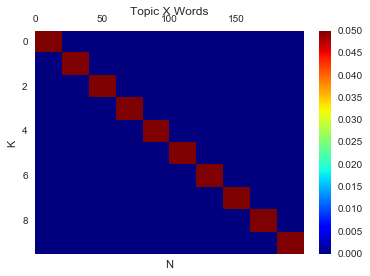

(100, 200)


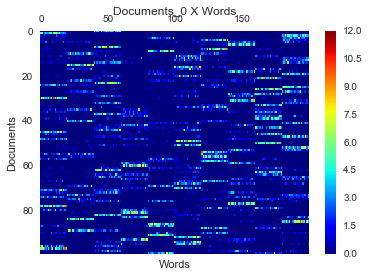

In [44]:
counts, vocab = gen.generate_input_counts(K, vocab_size, document_length, n_docs, copies)

In [45]:
print vocab[0:10]

['word_0' 'word_1' 'word_2' 'word_3' 'word_4' 'word_5' 'word_6' 'word_7'
 'word_8' 'word_9']


<h2>2. Run LDA</h2>

In [46]:
lda = MultifileLDA(counts, vocab)
n_samples = 200
n_burn = 100
n_thin = 5
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 ..........

Using Numpy for multi-file LDA sampling
Burn-in     1 .  Log likelihood = -79167.914 
Burn-in     2 .  Log likelihood = -71205.566 
Burn-in     3 .  Log likelihood = -60822.835 
Burn-in     4 .  Log likelihood = -52902.488 
Burn-in     5 .  Log likelihood = -48264.352 
Burn-in     6 .  Log likelihood = -45953.132 
Burn-in     7 .  Log likelihood = -44438.467 
Burn-in     8 .  Log likelihood = -43650.312 
Burn-in     9 .  Log likelihood = -43220.659 
Burn-in    10 .  Log likelihood = -42797.065 
Burn-in    11 .  Log likelihood = -42441.018 
Burn-in    12 .  Log likelihood = -42175.282 
Burn-in    13 .  Log likelihood = -41705.298 
Burn-in    14 .  Log likelihood = -41675.155 
Burn-in    15 .  Log likelihood = -41415.357 
Burn-in    16 .  Log likelihood = -41267.978 
Burn-in    17 .  Log likelihood = -41206.576 
Burn-in    18 .  Log likelihood = -41194.516 
Burn-in    19 .  Log likelihood = -41059.647 
Burn-in    20 .  Log likelihood = -40829.300 
Burn

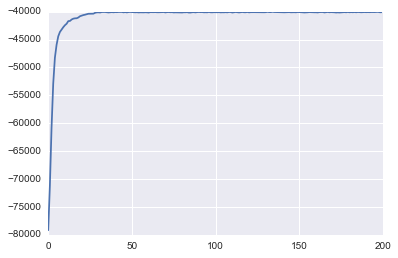

In [47]:
plt.plot(lda.log_likelihoods)

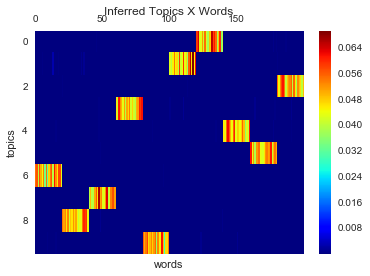

In [48]:
gen._plot_nicely(lda.topic_word_, 'Inferred Topics X Words', 'words', 'topics')

In [49]:
pa = lda.posterior_alphas
print len(pa)

20


In [50]:
analysis = MultifileAnalysis()
analysis.load_synthetic(counts, vocab, lda)
viz = MultifileLDAViz(analysis)

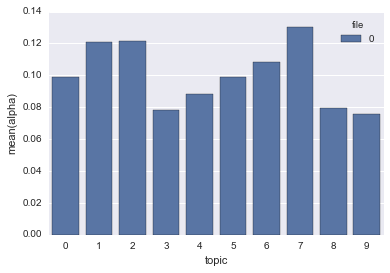

In [51]:
df = viz.plot_e_alphas()

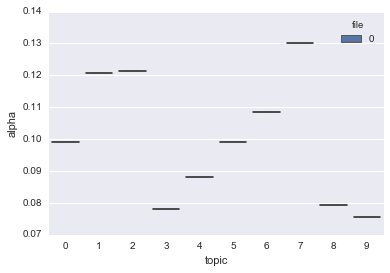

In [52]:
df = viz.plot_boxplot_alphas()